In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def load_curves_and_preds(name_run):

    curvas = np.load(f"../resultados/{name_run}\curvas.npy", allow_pickle=True).item()

    results = np.load(f"../resultados/{name_run}/test_results.npz")
    preds = torch.tensor(results["preds"])
    targets = torch.tensor(results["targets"])

    return curvas, preds, targets

In [7]:
resultados = {
              "Delight Sersic OIDS": load_curves_and_preds("delight_h2f_sersic_oids"),
              "Autolabeling Sersic OIDS batch 40": load_curves_and_preds("autolabeling_h2f_sersic_oids"),
              "Autolabeling Sersic OIDS batch 256": load_curves_and_preds("autolabeling_h2f_sersic_oids_bs256"),
              "Augmented dataset[x1] Sersic OIDS": load_curves_and_preds("augmented_dataset_h2f_sersic_oids_bs256"),
              "Augmented dataset[x10] Sersic OIDS": load_curves_and_preds("augmented_dataset_x10_h2f_sersic_oids"),

              }

### Functions

In [8]:
def curves_comparisson(resultados, experiments):
    """
    Muestra dos subplots: uno con curvas de entrenamiento y otro con curvas de validación
    para un subconjunto de experimentos en el diccionario `resultados`.

    Args:
        resultados (dict): Diccionario donde cada key es el nombre del experimento y cada valor es
                           una tupla (curvas, preds, targets).
        experiments (list of str): Lista de keys dentro de `resultados` que se desean graficar.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    for key in experiments:
        curvas, _, _ = resultados[key]
        epochs = np.arange(len(curvas["train_loss"])) + 1
        ax1.plot(epochs, curvas["train_loss"], label=key)
        ax2.plot(epochs, curvas["val_loss"], label=key)

    ax1.set_title("Training Loss")
    ax2.set_title("Validation Loss")

    for ax in [ax1, ax2]:
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()

    plt.tight_layout()
    plt.show()

In [10]:
def get_mse_df_from_resultados(resultados):
    """
    Calcula el MSE por transformación para cada experimento del diccionario `resultados`.

    Args:
        resultados (dict): Diccionario donde cada valor es una tupla (curvas, preds, targets).

    Returns:
        pd.DataFrame: DataFrame con los experimentos como filas y los MSE por transformación como columnas.
    """
    mse = torch.nn.MSELoss()
    
    transformations = {
        0: "Original",
        1: "Rotation 90°",
        2: "Rotation 180°",
        3: "Rotation 270°",
        4: "Horizontal Flip",
        5: "HF + Rot 90°",
        6: "HF + Rot 180°",
        7: "HF + Rot 270°",
    }

    data = []

    for name, (_, preds, targets) in resultados.items():
        row = {}
        for pos, trans_name in transformations.items():
            row[trans_name] = mse(targets[:, pos, :], preds[:, pos, :]).item()
        row["Experimento"] = name
        data.append(row)

    df = pd.DataFrame(data)
    df = df.set_index("Experimento")
    return df

### Curves

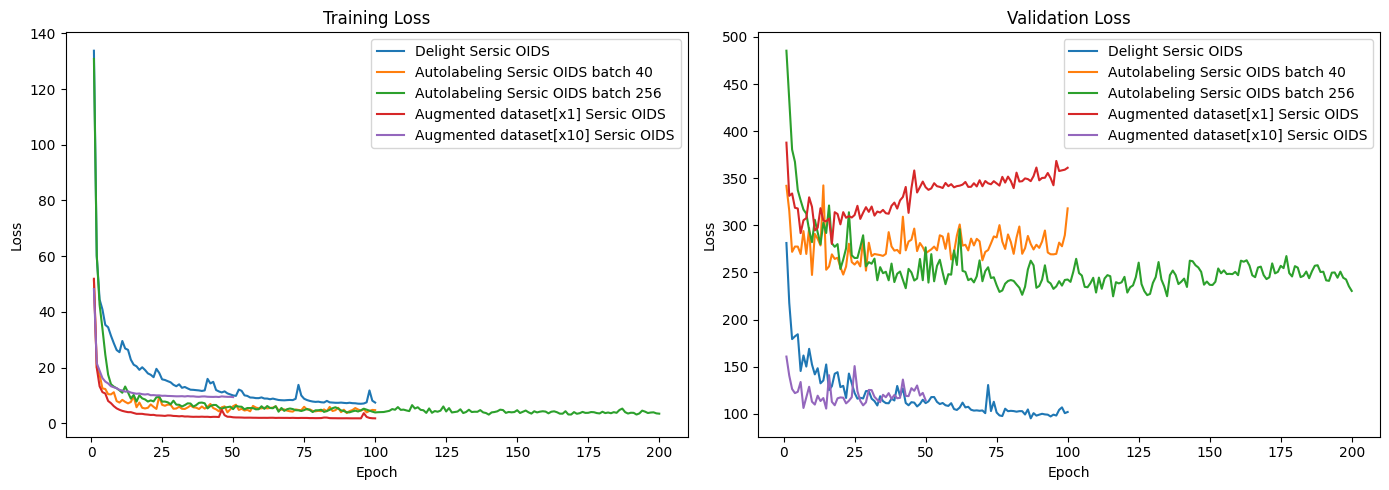

In [11]:
# nuevos

curves_comparisson(resultados, experiments=["Delight Sersic OIDS",
                                            "Autolabeling Sersic OIDS batch 40",
                                            "Autolabeling Sersic OIDS batch 256",
                                            "Augmented dataset[x1] Sersic OIDS",
                                            "Augmented dataset[x10] Sersic OIDS"])

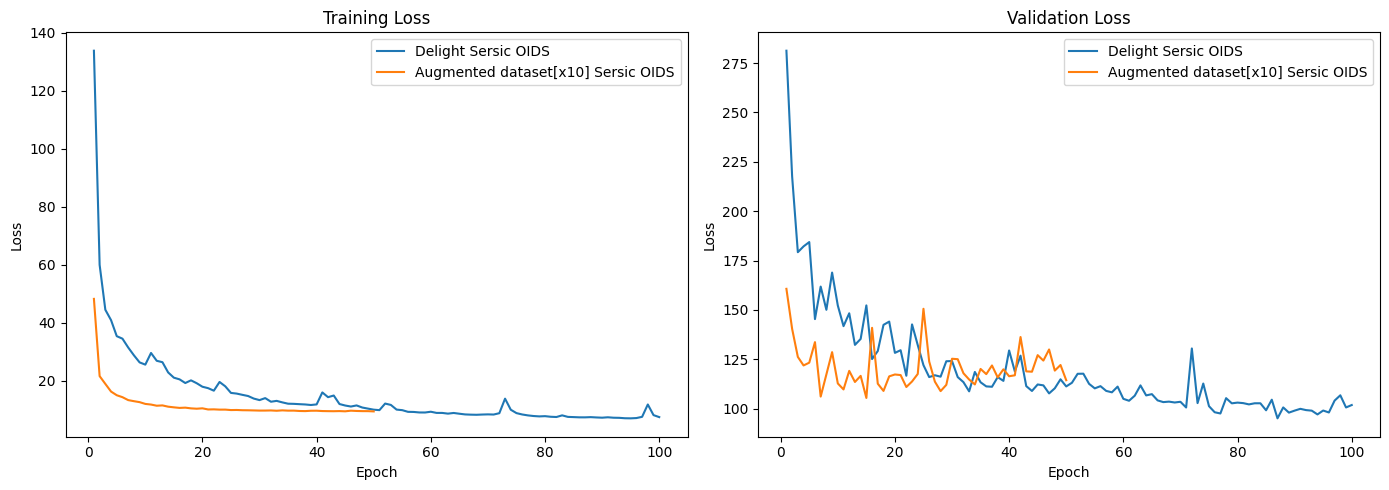

In [13]:
curves_comparisson(resultados, experiments=["Delight Sersic OIDS",
                                            "Augmented dataset[x10] Sersic OIDS"])

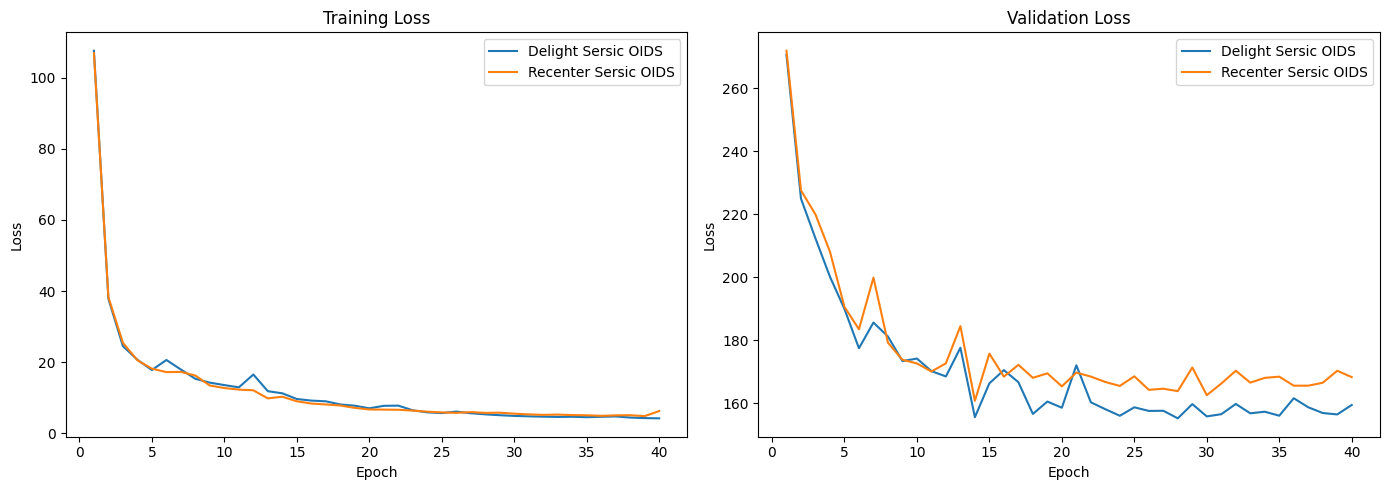

In [38]:
curves_comparisson(resultados, experiments=["Delight Sersic OIDS","Recenter Sersic OIDS"])

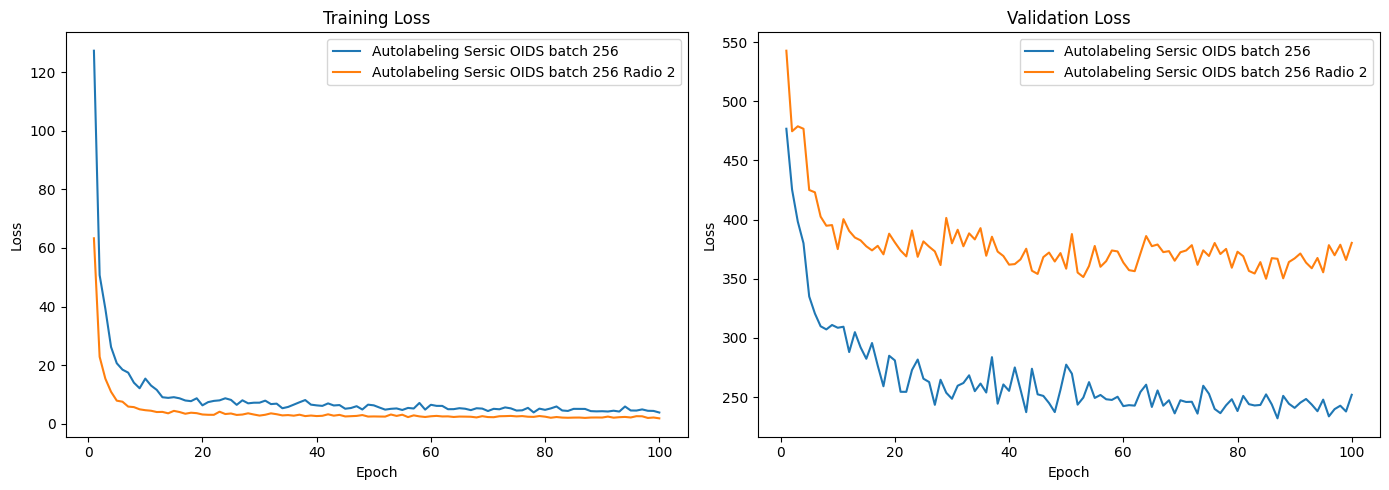

In [67]:
curves_comparisson(resultados, experiments=["Autolabeling Sersic OIDS batch 256","Autolabeling Sersic OIDS batch 256 Radio 2"])

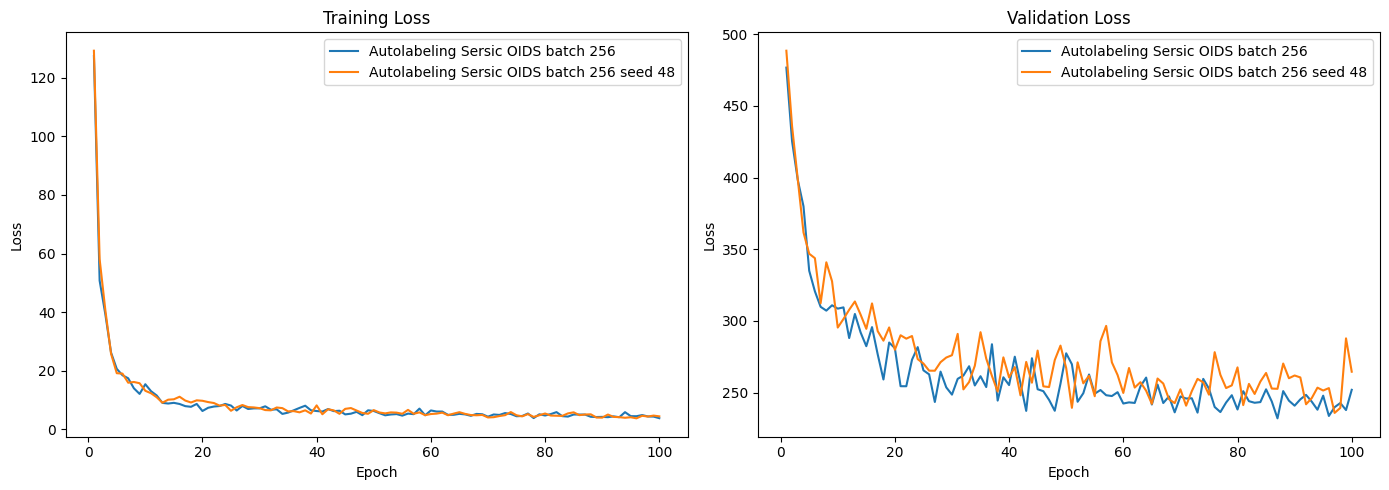

In [57]:
curves_comparisson(resultados, experiments=["Autolabeling Sersic OIDS batch 256","Autolabeling Sersic OIDS batch 256 seed 48"])

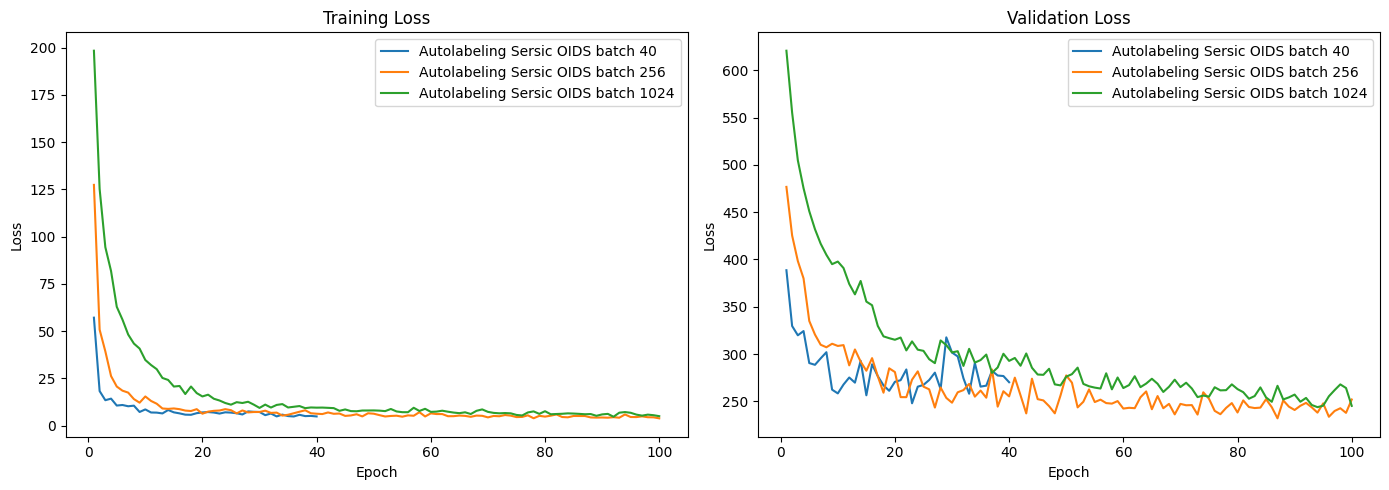

In [45]:
curves_comparisson(resultados, experiments=["Autolabeling Sersic OIDS batch 40","Autolabeling Sersic OIDS batch 256","Autolabeling Sersic OIDS batch 1024"])

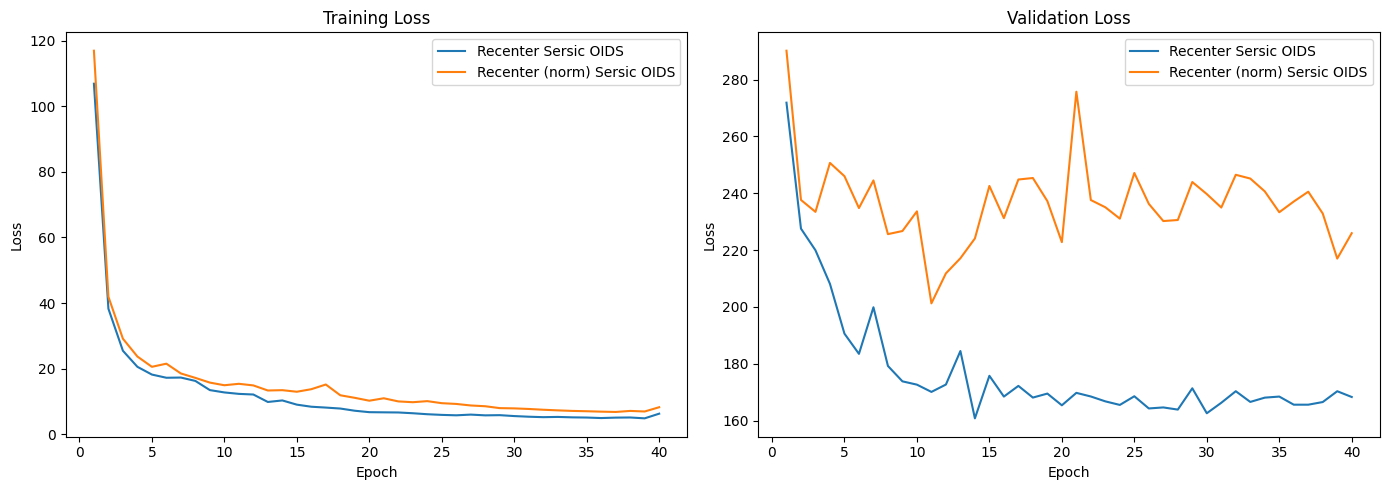

In [42]:
curves_comparisson(resultados, experiments=["Recenter Sersic OIDS","Recenter (norm) Sersic OIDS"])

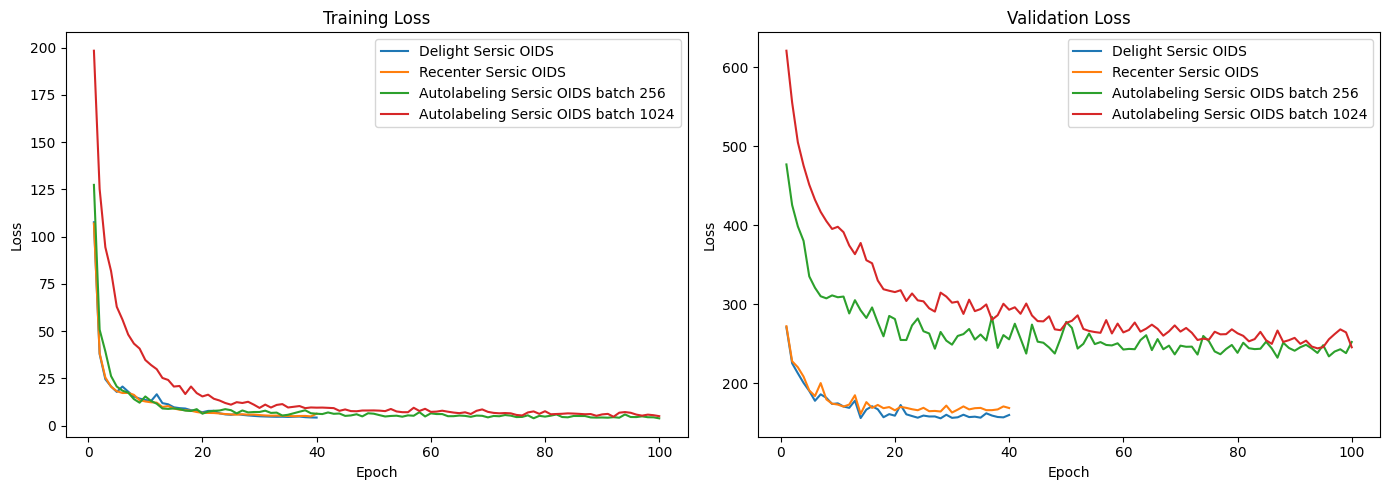

In [51]:
curves_comparisson(resultados, experiments=["Delight Sersic OIDS", "Recenter Sersic OIDS","Autolabeling Sersic OIDS batch 256", "Autolabeling Sersic OIDS batch 1024"])

### Metrics

In [14]:
df_metrics = get_mse_df_from_resultados(resultados)
df_metrics

,Original,Rotation 90°,Rotation 180°,Rotation 270°,Horizontal Flip,HF + Rot 90°,HF + Rot 180°,HF + Rot 270°
Experimento,,,,,,,,
Delight Sersic OIDS,93.409706,91.678413,89.943138,99.109749,93.318085,90.430962,97.076645,93.190201
Autolabeling Sersic OIDS batch 40,261.326630,261.452179,262.578156,265.592010,265.243591,264.604767,261.921326,261.172424
Autolabeling Sersic OIDS batch 256,239.703064,239.737808,239.429260,240.557129,239.851685,241.766266,238.793381,238.415039
Augmented dataset[x1] Sersic OIDS,294.911224,293.328827,299.865814,303.300690,301.253784,301.805511,293.651215,295.038147
Augmented dataset[x10] Sersic OIDS,105.053879,97.767403,101.964287,102.313835,101.059967,108.003288,103.741676,102.567513


In [68]:
df_metrics = get_mse_df_from_resultados(resultados)

In [69]:
df_metrics

,Original,Rotation 90°,Rotation 180°,Rotation 270°,Horizontal Flip,HF + Rot 90°,HF + Rot 180°,HF + Rot 270°
Experimento,,,,,,,,
Delight Delight OIDS,58.144180,60.031582,57.300060,58.885513,57.625965,61.410122,60.537594,56.695084
Delight Sersic OIDS,162.132843,160.313889,159.254425,159.774048,162.529907,161.586288,161.442719,156.973801
Recenter Sersic OIDS,171.442627,168.719452,172.338074,171.556595,172.384003,168.911407,172.105453,169.884750
Recenter (norm) Sersic OIDS,219.227814,220.310883,219.105225,219.833771,222.566147,220.135971,218.779953,217.135391
Autolabeling Sersic OIDS batch 40,265.082611,264.265167,261.115814,266.788147,267.179596,266.321106,266.738281,261.528351
Autolabeling Sersic OIDS batch 256,245.692703,242.143066,245.700195,248.869934,247.223907,247.225266,246.275833,242.250107
Autolabeling Sersic OIDS batch 256 seed 48,254.322372,252.083160,251.633331,249.659927,252.879578,250.800476,252.997986,256.811127
Autolabeling Sersic OIDS batch 256 Radio 2,383.026917,381.773468,378.306305,382.079468,379.988739,383.704468,382.895752,378.295868
Autolabeling Sersic OIDS batch 1024,268.386810,265.665009,265.629272,265.436676,267.303741,267.065979,266.232239,265.444702
